[![Binder](https://mybinder.org/badge_logo.svg)](https://nbviewer.org/github/vicente-gonzalez-ruiz/motion_estimation/blob/main/src/motion_estimation/farneback_ME.ipynb)

[![Colab](https://badgen.net/badge/Launch/on%20Google%20Colab/blue?icon=notebook)](https://colab.research.google.com/github/vicente-gonzalez-ruiz/motion_estimation/blob/main/src/motion_estimation/farneback_ME.ipynb)

# Testing Farnebäck's optical flow estimator 1n 1D

In [1]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    !apt update
    !apt install imagemagick
    !apt install cm-super
    !apt install dvipng
    !apt install bc
    !apt install texlive-latex-extra
    !apt install texlive-fonts-recommended

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [2]:
!which python

/shared/PEs/OF3D/bin/python


In [3]:
!pip install --upgrade pip

In [4]:
import cv2

In [5]:
try:
    import scipy
except:
    !pip install scipy
    import scipy

In [6]:
try:
    import skimage
except:
    !pip install scikit-image
    import skimage

In [7]:
try:
    import numpy as np
except:
    !pip install numpy
    import numpy as np

In [8]:
try:
    import matplotlib
    import matplotlib.pyplot as plt
    import matplotlib.axes as ax
    import pylab
except:
    !pip install matplotlib
    import matplotlib
    import matplotlib.pyplot as plt
    import matplotlib.axes as ax
    import pylab

plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}" #for \text command
   
%matplotlib inline

In [9]:
import logging

In [10]:
try:
    from color_transforms import YCoCg as YUV
except:
    !pip install "color_transforms @ git+https://github.com/vicente-gonzalez-ruiz/color_transforms"
    from color_transforms import YCoCg as YUV

In [11]:
try:
    from image_IO import image_1 as gray_image
    from image_IO import image_3 as RGB_image
except:
    !pip install "image_IO @ git+https://github.com/vicente-gonzalez-ruiz/image_IO"
    from image_IO import image_1 as gray_image
    from image_IO import image_3 as RGB_image

In [12]:
try:
    from information_theory import information
    #from information_theory import distortion
except:
    !pip install "information_theory @ git+https://github.com/vicente-gonzalez-ruiz/information_theory"
    from information_theory import information
    #from information_theory import distortion

try:
    import motion_estimation
    #import optical_flow as motion
    #from motion_estimation import farneback
    #from motion_estimation import display
    #from motion_estimation import project
except:
    !pip install "motion_estimation @ git+https://github.com/vicente-gonzalez-ruiz/motion_estimation"
    #from motion_estimation import farneback
    import motion_estimation
    #import display
    #import prediction
    #from motion_estimation import optical_flow as motion
    #from motion_estimation import farneback as motion_estimator
    #from motion_estimation import display
    #from motion_estimation import predict

In [13]:
#from motion_estimation._2D.farneback import Estimator_in_CPU as Estimator
from motion_estimation._1D.farneback_python import Farneback as Estimator
#from motion_estimation._1D.helpers import show_vectors
from motion_estimation._1D.project import project

## Tile of Stockholm

In [14]:
%%bash
URL="https://hpca.ual.es/~vruiz/videos/"
sequence="stockholm_1280x768x50x420x578.avi"
output_prefix="/tmp/original_"
number_of_frames=16
first_frame=2
~/repos/image_synthesis/extract_frames.sh -u $URL -s $sequence -o $output_prefix -n $number_of_frames -f $first_frame

URL = https://hpca.ual.es/~vruiz/videos/
sequence file name = stockholm_1280x768x50x420x578.avi
output prefix = /tmp/original_
number of frames to extract = 16
first frame to extract = 2
/tmp/stockholm_1280x768x50x420x578.avi exists. Only extracting ...


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [15]:
sequence = "/tmp/original_"
img = RGB_image.read(sequence + "003.png")

[image_3.py:39 read() INFO] /tmp/original_003.png (768, 1280, 3) uint8 len=1927644 max=255 min=0


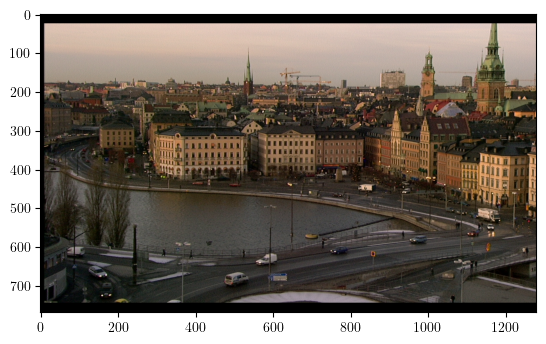

In [16]:
plt.imshow(img)

In [17]:
img_Y = YUV.from_RGB(img.astype(np.int16))[..., 0]

In [18]:
estimator = Estimator(verbosity=logging.WARNING)

## Testing correctness

In [19]:
R = img_Y[500]
P = np.roll(R, 10)

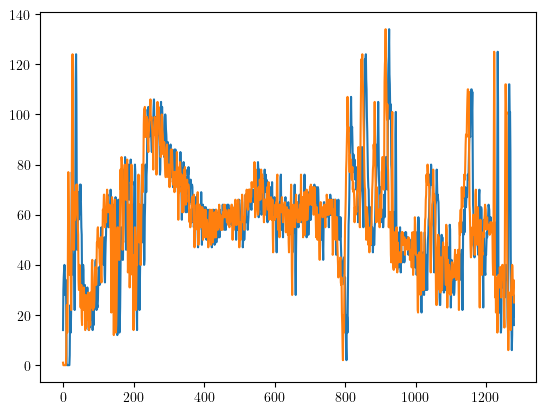

In [20]:
plt.plot(P)
plt.plot(R)

In [21]:
MVs = estimator.pyramid_get_flow(target=P, reference=R, sigma_poly=4.0, sigma_flow=4.0, pyr_levels=2)

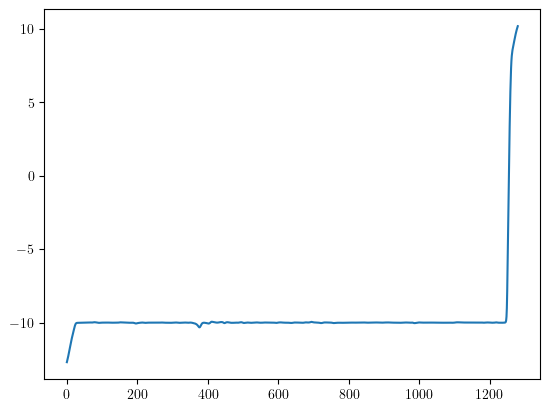

In [22]:
plt.plot(MVs)

In [23]:
hat_P = project(R, np.squeeze(MVs))
E1 = (P - hat_P).astype(np.int16)

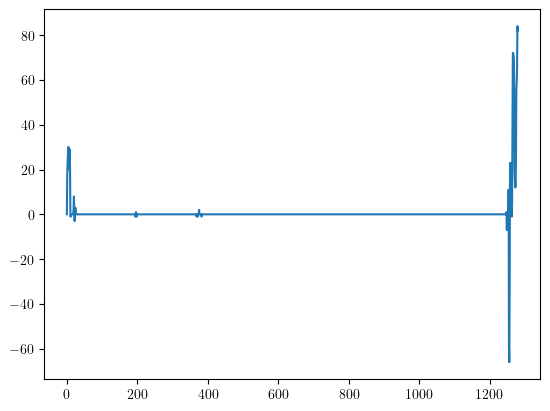

In [24]:
plt.plot(E1)

## Testing effectiveness

### Using only one line

In [30]:
R = img_Y[500]
P = img_Y[501]

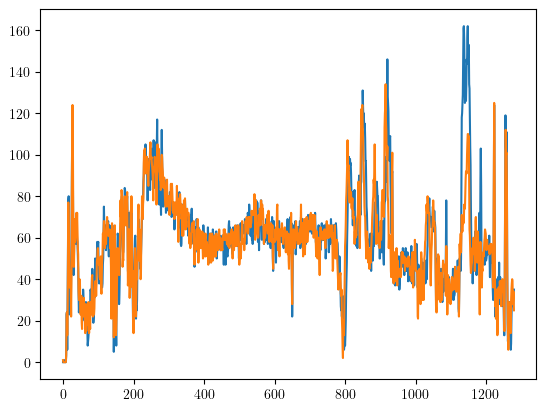

In [31]:
plt.plot(P)
plt.plot(R)

In [32]:
MVs = estimator.pyramid_get_flow(target=P, reference=R, sigma_poly=4.0, sigma_flow=4.0, pyr_levels=2)

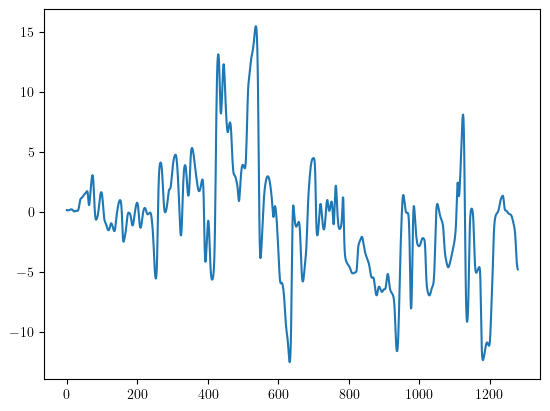

In [33]:
plt.plot(MVs)

In [29]:
hat_P = project(R, np.squeeze(MVs))
E0 = P - R
E1 = (P - hat_P).astype(np.int16)

In [ ]:
plt.plot(E0)
plt.plot(E1)
plt.plot(E0, label="without OF")
plt.plot(E1, label="with OF")
plt.legend()
plt.plot()

In [ ]:
information.entropy(E0)

In [ ]:
information.entropy(E1)

### Using all the lines

In [ ]:
from numpy.linalg import LinAlgError
E0 = np.empty_like(img_Y, dtype=np.int16)
E1 = np.empty_like(img_Y, dtype=np.int16)
for i in range(img_Y.shape[0] - 1):
    print(i, end=' ')
    R = img_Y[i]
    P = img_Y[i+1]
    try:
        MVs = estimator.pyramid_get_flow(target=P, reference=R, sigma_poly=4.0, sigma_flow=4.0, pyr_levels=2)
    except LinAlgError as e:
        print(f"Caught LinAlgError: {e}")
        MVs = np.zeros_like(R)
    hat_P = project(R, np.squeeze(MVs))
    E0[i] = P - R
    E1[i] = P - hat_P

In [ ]:
plt.imshow(E0, cmap="gray")

In [ ]:
plt.imshow(E1, cmap="gray")

In [ ]:
information.entropy(E0.flatten())

In [ ]:
information.entropy(E1.flatten())

In [ ]:
input()

In [ ]:
%matplotlib inline
plt.figure()
plt.plot(MVs)
plt.show()

In [ ]:
hat_P = project(R_Y, np.squeeze(MVs))

In [ ]:
E0 = P_Y - R_Y

In [ ]:
E1 = (P_Y - hat_P).astype(np.int16)

In [ ]:
plt.figure()
plt.plot(R_Y)
plt.plot(hat_P)
plt.plot(E0, label="without OF")
plt.plot(E1, label="with OF")
plt.legend()
plt.show()

In [ ]:
E1.dtype

In [ ]:
information.entropy(E0)

In [ ]:
information.entropy(E1)

In [ ]:
plt.imshow(E0, cmap="gray")

In [ ]:
plt.imshow(E1, cmap="gray")

In [ ]:
input()

In [ ]:
c = np.ones_like(R_Y)
MVs = estimator.get_flow(np.roll(R_Y,10), R_Y, c, c, mu=0)

In [ ]:
MVs.shape

In [ ]:
plt.plot(MVs)

In [ ]:
plt.imshow(R)

In [ ]:
plt.imshow(np.swapaxes(R, 1, 0))

In [ ]:
R = np.swapaxes(R, 0, 1)
P = np.swapaxes(P, 0, 1)

In [ ]:
R.shape

In [ ]:
P.shape

In [ ]:
R_Y = YUV.from_RGB(R.astype(np.int16))[..., 0]
P_Y = YUV.from_RGB(P.astype(np.int16))[..., 0]

In [ ]:
print(R_Y, P_Y)

In [ ]:
print(R_Y.shape, P_Y.shape)

In [ ]:
#initial_MVs = np.zeros((P_Y.shape[0], P_Y.shape[1], 2), dtype=np.float32)
#MVs = motion.Farneback_ME(predicted=P_Y, reference=R_Y, initial_MVs=initial_MVs)
MVs = estimator.get_flow(target=P_Y, reference=R_Y, prev_flow=initial_MVs)

In [ ]:
print(np.max(MVs), np.min(MVs))

In [ ]:
R_Y.shape

In [ ]:
#gray_image.show(np.stack([R_Y, R_Y, R_Y, P_Y, P_Y, P_Y]), size=(30,10))
gray_image.show(np.stack([R_Y, P_Y], axis=0).reshape(6, 256), size=(30,10))


In [ ]:
MVs.shape

In [ ]:
motion_estimation.helpers.show_vectors(MVs)

In [ ]:
img = RGB_image.read(sequence + "015.png")[100:356, 100:456]
RGB_image.show(img,"")
print(img.dtype)

In [ ]:
#!export OPENCV_LOG_LEVEL=DEBUG

def filter_AAABBB(Y_img):
    # Iterate over rows
    total_flow_through_rows = []
    flow = np.zeros((3, Y_img.shape[1], 2), dtype=np.float32)
    for y in range(Y_img.shape[0]-1):
        prev = np.stack([Y_img[y], Y_img[y], Y_img[y]])
        #prev = np.stack([Y_img[y], Y_img[y+1], Y_img[y]])
        next = np.stack([Y_img[y+1], Y_img[y+1], Y_img[y+1]])
        #print(prev)
        if y==10:
            print(prev.shape, next.shape, flow.shape)
            print(np.max(prev), np.max(next))
        flow = motion.Farneback_ME(predicted=next, reference=prev, initial_MVs=flow, wside=3)
        total_flow_through_rows.append(flow[1])
    # Iterate over columns
    total_flow_through_cols = []
    flow = np.zeros((3, Y_img.shape[0], 2), dtype=np.float32)
    for x in range(Y_img.shape[1]-1):
        prev = np.stack([Y_img[:, x], Y_img[:, x], Y_img[:, x]])
        next = np.stack([Y_img[:, x+1], Y_img[:, x+1], Y_img[:, x+1]])
        flow = motion.Farneback_ME(predicted=next, reference=prev, initial_MVs=flow, wside=3)
        total_flow_through_cols.append(flow[1])
    return np.stack(total_flow_through_rows), np.stack(total_flow_through_cols)

N = 5

def filter_AAABBB(Y_img):
    print(np.average(Y_img))
    extended_img = np.zeros(shape=(Y_img.shape[0]+N, Y_img.shape[1]+N), dtype=Y_img.dtype)
    extended_img[N//2:Y_img.shape[0]+N//2, N//2:Y_img.shape[1]+N//2] = Y_img[:, :]
    # Iterate over rows
    total_flow_rows_pass = []
    prev_flow = np.zeros((N, Y_img.shape[1], 2), dtype=np.float32)
    N_rows = Y_img.shape[0]
    c = 0
    for y in range(N_rows):
        #prev = np.stack([Y_img[y], Y_img[(y+1)%N_rows], Y_img[(y+2)%N_rows]])
        #next = np.stack([Y_img[(y+3)%N_rows], Y_img[(y+4)%N_rows], Y_img[(y+5)%N_rows]])
        #prev = np.stack([Y_img[y], Y_img[y], Y_img[y]])
        #next = np.stack([Y_img[(y+1)%N_rows], Y_img[(y+1)%N_rows], Y_img[(y+1)%N_rows]])
        prev = extended_img[y:y+N]
        #next = np.roll(prev, 1, axis=1)
        next = extended_img[y+1:y+1+N]
        assert prev.shape==next.shape, f"{c} {prev.shape} {next.shape}"
        #print(prev)
        #print(next)
        #print(prev)
        #if y==10:
        #    print(prev.shape, next.shape, flow[1].shape)
        #    print(np.max(prev), np.max(next))
        #    print(np.max(Y_img[y]), np.max(Y_img))
        #    print(prev, next)
        #flow = motion.Farneback_ME(predicted=next, reference=prev, initial_MVs=prev_flow, wside=N)
        flow = cv2.calcOpticalFlowFarneback(prev=prev, next=next, flow=None,
                                            pyr_scale=0.5, levels=0, winsize=N,
                                            iterations=3, poly_n=5, poly_sigma=1.2,
                                            flags=0)
        #prev_flow = flow.copy()
        #flow = np.random.rand(flow.size).reshape(flow.shape).astype(np.float32)
        print(c, np.max(np.abs(flow[N>>1][..., 0])), np.max(np.abs(flow[N>>1][..., 1])))
        #print(flow.shape)
        #print(np.unravel_index(np.argmax(abs(flow[1])), flow[1].shape), np.max(abs(flow[1])), end=' ')
        total_flow_rows_pass.append(flow[N>>1][..., 0])
        #print(flow[0], total_flow_rows_pass)
        max = 0
        for i in total_flow_rows_pass:
            _max = np.max(np.abs(i))
            if _max > max:
                max = _max
        #print("max=", max)
        c += 1
    #print(len(total_flow_rows_pass))
    #print(total_flow_rows_pass)
    #for i in total_flow_rows_pass:
    #    if np.max(np.abs(i)) != 0.0:
    #        print("!", end='')
    #total_flow_rows_pass = np.array(total_flow_rows_pass).reshape((Y_img.shape[0], Y_img.shape[1]))
    total_flow_rows_pass = np.stack(total_flow_rows_pass)
    print("max=", np.max(np.abs(total_flow_rows_pass)))
    # Iterate over columns
    total_flow_cols_pass = []
    flow = np.zeros((N, Y_img.shape[0], 2), dtype=np.float32)
    N_cols = Y_img.shape[1]
    for x in range(N_cols):
        prev = np.stack([Y_img[:, x], Y_img[:, x], Y_img[:, x]])
        next = np.stack([Y_img[:, (x+1)%N_cols], Y_img[:, (x+1)%N_cols], Y_img[:, (x+1)%N_cols]])
        #prev = np.stack([Y_img[:, x], Y_img[:, (x+1)%N_cols], Y_img[:, (x+2)%N_cols]])
        #next = np.stack([Y_img[:, (x+3)%N_cols], Y_img[:, (x+4)%N_cols], Y_img[:, (x+4)%N_cols]])
        #flow = motion.Farneback_ME(predicted=next, reference=prev, initial_MVs=flow, wside=3)
        total_flow_cols_pass.append(flow[N>>1][..., 1])
    #total_flow_cols_pass = np.stack(total_flow_cols_pass)
    total_flow_cols_pass = np.array(total_flow_cols_pass).reshape(Y_img.shape)
    return total_flow_rows_pass, total_flow_cols_pass

def get_fields(Y_img):
    extended_img = np.zeros(shape=(Y_img.shape[0]+N, Y_img.shape[1]+N), dtype=Y_img.dtype)
    extended_img[N//2:Y_img.shape[0]+N//2, N//2:Y_img.shape[1]+N//2] = Y_img[:, :]
    # Iterate over rows
    total_flow_rows_pass = []
    prev_flow = np.zeros((N, Y_img.shape[1], 2), dtype=np.float32)
    N_rows = Y_img.shape[0]
    c = 0
    for y in range(N_rows):
        prev = extended_img[y:y+N]
        #next = np.roll(prev, 1, axis=1)
        next = extended_img[y+1:y+1+N]
        #prev_flow = flow.copy()
        flow = cv2.calcOpticalFlowFarneback(prev=prev, next=next, flow=None,
                                            pyr_scale=0.5, levels=0, winsize=N,
                                            iterations=3, poly_n=5, poly_sigma=1.2,
                                            flags=0)
        #flow = np.random.rand(flow.size).reshape(flow.shape).astype(np.float32)
        #print(c, np.max(np.abs(flow[N>>1][..., 0])), np.max(np.abs(flow[N>>1][..., 1])))
        #print(np.unravel_index(np.argmax(abs(flow[1])), flow[1].shape), np.max(abs(flow[1])), end=' ')
        #total_flow_rows_pass.append(flow[N>>1][..., 0])
        total_flow_rows_pass.append(flow[(N>>1) + 1, :, 0])
        c += 1

    #total_flow_rows_pass = np.array(total_flow_rows_pass).reshape((Y_img.shape[0], Y_img.shape[1]))
    total_flow_rows_pass = np.stack(total_flow_rows_pass)
    # Iterate over columns
    total_flow_cols_pass = []
    flow = np.zeros((Y_img.shape[0], N, 2), dtype=np.float32)
    N_cols = Y_img.shape[1]
    for x in range(N_cols):
        prev = extended_img[..., x:x+N]
        next = extended_img[..., x+1:x+1+N]
        #print(prev.shape, next.shape)
        flow = cv2.calcOpticalFlowFarneback(prev=prev, next=next, flow=None,
                                            pyr_scale=0.5, levels=0, winsize=N,
                                            iterations=3, poly_n=5, poly_sigma=1.2,
                                            flags=0)
        #print(flow[..., N>>1, 1].shape)
        total_flow_cols_pass.append(flow[..., (N>>1) + 1, 1])
    total_flow_cols_pass = np.stack(total_flow_cols_pass, axis=1)
    #total_flow_cols_pass = np.array(total_flow_cols_pass).reshape(Y_img.shape)
    return total_flow_rows_pass, total_flow_cols_pass

In [ ]:
Y_img = YUV.from_RGB(img.astype(np.int16))[..., 0]
#flow_rows, flow_cols = filter_AAABBB(Y_img[100:105,100:107])
#flow_rows, flow_cols = filter_AAABBB(Y_img[100:125,100:125])
#flow_rows, flow_cols = filter_AAABBB(Y_img[100:225,100:225])
#flow_rows, flow_cols = filter_AAABBB(Y_img[100:625,100:625])
#flow_rows, flow_cols = filter_AAABBB(Y_img[10:758,10:1270])
#flow_rows, flow_cols = filter_AAABBB(Y_img[100:125,100:225])
#flow_rows, flow_cols = filter_AAABBB(Y_img[100:668,100:1180])
#flow_rows, flow_cols = filter_AAABBB(Y_img[40:740,40:1170])
#flow_rows, flow_cols = filter_AAABBB(Y_img)
flow_rows, flow_cols = get_fields(Y_img)

In [ ]:
768*1280

In [ ]:
flow_rows.shape

In [ ]:
flow_cols.shape

In [ ]:
np.max(flow_rows)

In [ ]:
768*1280

In [ ]:
np.min(flow_rows)

In [ ]:
matplotlib.pyplot.imshow(X=flow_rows, cmap="gray")

In [ ]:
matplotlib.pyplot.imshow(X=flow_cols, cmap="gray")

In [ ]:
gray_image.show(flow_rows*255,"")

In [ ]:
gray_image.show(flow_cols*255,"")

In [ ]:
def get_flow(prev, next, l=3, w=5, prev_flow=None):
    flow = cv2.calcOpticalFlowFarneback(prev=prev, next=next, flow=prev_flow,
                                        pyr_scale=0.5, levels=l, winsize=w,
                                        iterations=3, poly_n=5, poly_sigma=1.2,
                                        flags=0)
    return flow[(N>>1) + 1, :, 0]

In [ ]:
def vertical_filtering(img, kernel):
    KS = kernel.size
    KS2 = KS//2
    extended_img = np.zeros(shape=(img.shape[0] + KS, img.shape[1] + KS), dtype=img.dtype)
    extended_img[KS2:img.shape[0] + KS2, KS2:img.shape[1] + KS2] = img[:, :]
    N_rows = img.shape[0]
    tmp_slice = np.zeros(shape=(img.shape[1]))
    for y in range(N_rows):
        for i in range(KS2 - 1, -1, -1):
            prev = extended_img[y:y + w]
            next = extended_img[y + 1:y + 1 + w]
            flow = get_flow(prev, next, l, w, None)

# 2D Gaussian filtering

In [ ]:
import time

def vertical_gaussian_filtering(img, kernel, mean):
    KL = kernel.size
    KL2 = KL//2
    extended_img = np.full(fill_value=mean, shape=(img.shape[0] + KL, img.shape[1]))
    extended_img[KL2:img.shape[0] + KL2, :] = img[:, :]
    filtered_img = []
    #filtered_img = np.empty_like(img, dtype=np.float32)
    N_rows = img.shape[0]
    N_cols = img.shape[1]
    #horizontal_line = np.empty(N_cols, dtype=np.float32)
    #print(horizontal_line.shape)
    for y in range(N_rows):
        #horizontal_line.fill(0)
        horizontal_line = np.zeros(N_cols, dtype=np.float32)
        for i in range(KL):
            horizontal_line += extended_img[y + i, :] * kernel[i]
        filtered_img.append(horizontal_line)
        #filtered_img[y, :] = horizontal_line[:]
    filtered_img = np.stack(filtered_img, axis=0)
    return filtered_img

def horizontal_gaussian_filtering(img, kernel, mean):
    KL = kernel.size
    KL2 = KL//2
    extended_img = np.full(fill_value=mean, shape=(img.shape[0], img.shape[1] + KL))
    extended_img[:, KL2:img.shape[1] + KL2] = img[:, :]
    #filtered_img = []
    filtered_img = np.empty_like(img, dtype=np.float32)
    N_rows = img.shape[0]
    N_cols = img.shape[1]
    vertical_line = np.empty(N_rows, dtype=np.float32)
    for x in range(N_cols):
        #vertical_line = np.zeros(N_rows, dtype=np.float32)
        vertical_line.fill(0)
        for i in range(KL):
            vertical_line += extended_img[:, x + i] * kernel[i]
        #filtered_img.append(vertical_line)
        filtered_img[:, x] = vertical_line[:]
    #filtered_img = np.stack(filtered_img, axis=1)
    return filtered_img

def gaussian_filtering(img, kernel):
    mean = np.average(img)
    t0 = time.perf_counter()
    filtered_img_Y = vertical_gaussian_filtering(img, kernel, mean)
    t1 = time.perf_counter()
    print(t1 - t0)
    filtered_img_YX = horizontal_gaussian_filtering(filtered_img_Y, kernel, mean)
    t2 = time.perf_counter()
    print(t2 - t1)
    return filtered_img_YX

def gaussian_kernel(sigma):
    number_of_coeffs = 3
    number_of_zeros = 0
    while number_of_zeros < 2 :
        delta = np.zeros(number_of_coeffs)
        delta[delta.size//2] = 1
        coeffs = scipy.ndimage.gaussian_filter1d(delta, sigma=sigma)
        number_of_zeros = coeffs.size - np.count_nonzero(coeffs)
        number_of_coeffs += 1
    return coeffs[1:-1]

def color_gaussian_filtering(img, kernel):
    filtered_img_R = gaussian_filtering(img[..., 0], kernel)
    filtered_img_G = gaussian_filtering(img[..., 1], kernel)
    filtered_img_B = gaussian_filtering(img[..., 2], kernel)
    return np.stack([filtered_img_R, filtered_img_G, filtered_img_B], axis=2)

In [ ]:
kernel = gaussian_kernel(2.0)
filtered_img = color_gaussian_filtering(img, kernel)

In [ ]:
RGB_image.show(img,"")
RGB_image.show(filtered_img.astype(np.uint8),"")

# 2D OF-driven Gaussian filtering

In [ ]:

def horizontal_OF_gaussian_filtering(img, kernel, mean=128, l=3 , w=5):
    KL = kernel.size
    KL2 = KL//2
    extended_img = np.full(fill_value=mean, shape=(img.shape[0], img.shape[1] + KL + 2*w, img.shape[2]))
    extended_img[:, KL2 + w:img.shape[1] + KL2 + w] = img[:, :]
    filtered_img = []
    N_rows = img.shape[0]
    N_cols = img.shape[1]
    for x in range(N_cols):
        vertical_line = np.zeros(N_rows, dtype=np.float32)
        for i in range(KL):
            reference = extended_img[:, x + i    :x + i     + w] 
            target    = extended_img[:, x + i + 1:x + i + 1 + w]
            flow = get_flow(target, reference, l, w, None)
            #OF_compensated_slice = warp_slice(reference, flow)
            OF_compensated_slice = warp_slice(target, flow)
            OF_compensated_line = OF_compensated_slice[: , (w + 1) >> 1]
            vertical_line += OF_compensated_line * kernel[i]

        filtered_img.append(vertical_line)
    filtered_img = np.stack(filtered_img, axis=1)
    return filtered_img

def vertical_OF_gaussian_filtering(Y_img, img, kernel, mean, l=3 , w=5):
    KL = kernel.size
    KL2 = KL//2
    extended_Y_img = np.full(fill_value=mean[0], shape=(Y_img.shape[0] + KL + 2*w, Y_img.shape[1]))
    extended_Y_img[KL2 + w:Y_img.shape[0] + KL2 + w, :] = Y_img[:, :]
    filtered_img = []
    N_rows = img.shape[0]
    N_cols = img.shape[1]
    flow_rows = []
    for y in range(N_rows):
        horizontal_line = np.zeros(N_cols, dtype=np.float32)
        for i in range(KL):
            #reference = extended_img[y + i    :y + i     + w, :] 
            #target    = extended_img[y + i + 1:y + i + 1 + w, :]
            reference = extended_img[y    :y     + w, :] 
            target    = extended_img[y + i:y + i + w, :]
            #assert reference.shape == target.shape, f"{reference.shape} {target.shape}"
            flow = get_flow(target, reference, l, w, None)
            #flow = get_flow(reference, target, l, w, None)
            OF_compensated_slice = warp_slice(reference, flow)
            #OF_compensated_slice = warp_slice(target, flow)
            OF_compensated_line = OF_compensated_slice[(w + 1) >> 1, :]
            horizontal_line += OF_compensated_line * kernel[i]
            if i==0: #i==(KL-1):
                flow_rows.append(flow[(w + 1)>>1, :, 0])
        filtered_img.append(horizontal_line)
    filtered_img = np.stack(filtered_img, axis=0)
    flow_rows = np.stack(flow_rows)
    return filtered_img, flow_rows


def OF_gaussian_filtering(Y_img, img, kernel, l=3, w=5):
    mean = [np.average(img)[..., 0], np.average(img)[..., 1], np.average(img)[..., 2]]
    t0 = time.perf_counter()
    filtered_img_y, _ = vertical_OF_gaussian_filtering(Y_img, img, kernel, mean, l , w)
    t1 = time.perf_counter()
    print(t1 - t0)
    filtered_img_yx = horizontal_OF_gaussian_filtering(Y_img, filtered_img_y, kernel, mean, l , w)
    #filtered_img_YX = horizontal_OF_gaussian_filtering(img, kernel, mean, l , w)
    t2 = time.perf_counter()
    print(t2 - t1)
    return filtered_img_yx, _

def color_OF_gaussian_filtering(img, kernel, l=3, w=5):
    Y_img = YUV.from_RGB(img.astype(np.int16))[..., 0]
    filtered_img,_ = OF_gaussian_filtering(Y_img, img, kernel, l , w)
    #filtered_img_G,_ = OF_gaussian_filtering(Y_img, img, kernel, l , w)
    #filtered_img_B,_ = OF_gaussian_filtering(Y_img, img, kernel, l , w)
    #return np.stack([filtered_img_R, filtered_img_G, filtered_img_B], axis=2), flow_rows
    return filtered_img

In [ ]:
def warp_slice(reference, flow):
    height, width = flow.shape[:2]
    map_x = np.tile(np.arange(width), (height, 1))
    map_y = np.swapaxes(np.tile(np.arange(height), (width, 1)), 0, 1)
    map_xy = (flow + np.dstack((map_x, map_y))).astype('float32')
    warped_slice = cv2.remap(reference, map_xy, None,
                             interpolation=cv2.INTER_LINEAR,
                             borderMode=cv2.BORDER_REPLICATE)
    return warped_slice

def get_flow(reference, target, l=3, w=5, prev_flow=None):
    flow = cv2.calcOpticalFlowFarneback(prev=target, next=reference, flow=prev_flow,
                                            pyr_scale=0.5, levels=l, winsize=w,
                                            iterations=3, poly_n=5, poly_sigma=1.2,
                                            flags=0)
    return flow

def OF_gaussian_filtering(img, kernel, l=3, w=5):
    KL = kernel.size
    KL2 = KL//2
    Y = YUV.from_RGB(img.astype(np.int16))[..., 0]
    N_rows = img.shape[0]
    N_cols = img.shape[1]
    w2 = w//2
    extended_Y = cv2.resize(src = Y, dsize = (Y.shape[1] + KL + w, Y.shape[0] + KL + w))
    extended_Y[KL2:Y.shape[0] + KL2, KL2:Y.shape[1] + KL2] = Y[...]
    
    # Filtering along the vertical direction
    filtered_img = []
    for y in range(N_rows):
        horizontal_line = np.zeros(shape=(N_cols, img.shape[2]), dtype=np.float32)
        reference_slice_Y = extended_Y[y:y + w, :]
        for i in range(KL2):
            target_slice_Y = extended_Y[y + i:y + i + w, :]
            print(target_slice_Y.shape, reference_slice_Y.shape, w, y, i)
            flow = get_flow(target_slice_Y, reference_slice_Y, l, w, None)
            reference_slice = img[y:y + w, :]
            OF_compensated_vertical_slice = warp_slice(reference_slice, flow)
            OF_compensated_vertical_line = OF_compensated_vertical_slice[(w + 1) >> 1, :, :]
            horizontal_line += OF_compensated_line * kernel[i]
        horizontal_line += img[y, :, :] * kernel[KL2]
        for i in range(KL2 + 1, KL):
            target_slice_Y = extended_Y[y + i:y + i + w, :]
            flow = get_flow(target_slice_Y, reference_slice_Y, l, w, None)
            reference_slice = img[y:y + w, :]
            OF_compensated_slice = warp_slice(reference_slice, flow)
            OF_compensated_line = OF_compensated_slice[(w + 1) >> 1, :, :]
            horizontal_line += OF_compensated_line * kernel[i]
        filtered_img.append(horizontal_line)    
    filtered_img = np.stack(filtered_img, axis=0)
    
    img = filtered_img
    
    # Horizontal direction
    filtered_img = []
    for x in range(N_cols):
        vertical_line = np.zeros(shape=(N_rows, img.shape[2]), dtype=np.float32)
        reference_slice_Y = Y[:, x:x + w] 
        for i in range(KL2):
            target_slice_Y = Y[:, x + i:x + i + w]
            flow = get_flow(target_slice_Y, reference_slice_Y, l, w, None)
            reference = img[:, x:x + w]
            OF_compensated_slice = warp_slice(reference_slice, flow)
            OF_compensated_line = OF_compensated_slice[: , (w + 1) >> 1, :]
            vertical_line += OF_compensated_line * kernel[i]
        vertical_line += img[:, x, :] * kernel[KL2]
        for i in range(KL2 + 1, KL):
            target_slice_Y = Y[:, x + i:x + i + w]
            flow = get_flow(target_slice_Y, reference_slice_Y, l, w, None)
            reference = img[:, x:x + w]
            OF_compensated_slice = warp_slice(reference_slice, flow)
            OF_compensated_line = OF_compensated_slice[: , (w + 1) >> 1, :]
            vertical_line += OF_compensated_line * kernel[i]
        filtered_img.append(vertical_line)
    filtered_img = np.stack(filtered_img, axis=1)
    
    return filtered_img

def _OF_gaussian_filtering(img, kernel, l=3, w=5):
    KL = kernel.size
    KL2 = KL//2
    w2 = w//2
    Y = YUV.from_RGB(img.astype(np.int16))[..., 0]
    #Y_mean = np.average(Y_img)[..., 0]
    # Signal extension?
    #extended_Y_img = np.full(fill_value=mean[0], shape=(Y_img.shape[0] + KL + 2*w, Y_img.shape[1] + KL + 2*w))
    extended_Y = cv2.resize(src = Y, dsize = (Y.shape[1] + KL + w, Y.shape[0] + KL + w))
    extended_Y[KL2 + w:Y.shape[0] + KL2 + w2, KL2 + w:Y.shape[1] + KL2 + w2] = Y[...]
    #extended_img = np.full(fill_value=mean[0], shape=(img.shape[0] + KL + 2*w, img.shape[1] + KL + 2*w, img.shape[3]))
    extended_img = cv2.resize(src = img, dsize = (img.shape[1] + KL + 2*w, img.shape[0] + KL + 2*w))
    extended_img[KL2 + w:img.shape[0] + KL2 + w2, KL2 + w:img.shape[1] + KL2 + w2] = img[...]
    print(extended_img.shape)
    N_rows = img.shape[0]
    N_cols = img.shape[1]
    
    # Vertical
    filtered_img = []
    for y in range(N_rows):
        horizontal_line = np.zeros(shape=(N_cols, img.shape[2]), dtype=np.float32)
        reference_slice_Y = extended_Y[y + KL2:y + KL2 + w, :]
        for i in range(0, KL2):
            target_slice_Y = extended_Y[y + i:y + i + w, :]
        for i in range(KL):
            # For i=0, the flow==0, and this case can be out of the loop
            target_slice_Y = extended_Y[y + i:y + i + w, :]
            flow = get_flow(target_Y, reference_Y, l, w, None)
            #reference = extended_img[y:y + w, :]
            reference = extended_img[y:y + w, :]
            OF_compensated_slice = warp_slice(reference, flow)
            OF_compensated_line = OF_compensated_slice[(w + 1) >> 1, :, :]
            print(reference.shape, OF_compensated_slice.shape, OF_compensated_line.shape)
            horizontal_line += OF_compensated_line * kernel[i]
        filtered_img.append(horizontal_line)
    filtered_img = np.stack(filtered_img, axis=0)
    
    extended_img[KL2 + w:img.shape[0] + KL2 + w, KL2 + w:img.shape[1] + KL2 + w] = filtered_img[...]
    
    # Horizontal
    filtered_img = []
    for x in range(N_cols):
        vertical_line = np.zeros(N_rows, dtype=np.float32)
        for i in range(KL):
            reference_Y = extended_Y[:, x    :x +   + w] 
            target_Y    = extended_Y[:, x + i:x + i + w]
            flow = get_flow(target_Y, reference_Y, l, w, None)
            reference = extended_img[:, x:x + w]
            OF_compensated_slice = warp_slice(reference, flow)
            OF_compensated_line = OF_compensated_slice[: , (w + 1) >> 1]
            vertical_line += OF_compensated_line * kernel[i]
        filtered_img.append(vertical_line)
    filtered_img = np.stack(filtered_img, axis=1)
    
    return filtered_img


In [ ]:
def vertical_OF_gaussian_filtering(img, kernel, l =3, w=5):
    '''This method '''
    KL = kernel.size
    KL2 = KL//2
    Y = YUV.from_RGB(img.astype(np.int16))[..., 0]
    N_rows = img.shape[0]
    N_cols = img.shape[1]
    w2 = w//2
    extended_Y = cv2.resize(src = Y, dsize = (Y.shape[1] + KL + w, Y.shape[0] + KL + w))
    extended_Y[KL2:Y.shape[0] + KL2, KL2:Y.shape[1] + KL2] = Y[...]
    #extended_img = np.full(fill_value=128, shape=(img.shape[0] + KL, img.shape[1], img.shape[2]))
    extended_img = cv2.resize(src = img, dsize = (Y.shape[1], Y.shape[0] + KL))
    print(extended_img.shape)
    extended_img[KL2:img.shape[0] + KL2, :, :] = img[:, :, :]
    
    filtered_img = []
    #filtered_img = np.empty_like(img, dtype=np.float32)
    N_rows = img.shape[0]
    N_cols = img.shape[1]
    #horizontal_line = np.empty(N_cols, dtype=np.float32)
    #print(horizontal_line.shape)
    for y in range(N_rows):
        #horizontal_line.fill(0)
        horizontal_line = np.zeros(shape=(N_cols, img.shape[2]), dtype=np.float32)
        reference_slice_Y = extended_Y[y:y + w, :]
        reference_slice = img[y:y + w, :]
        for i in range(KL):
            #horizontal_line += extended_img[y + i, :] * kernel[i]
            target_slice_Y = extended_Y[y + i:y + i + w, :]
            #print(target_slice_Y.shape, reference_slice_Y.shape, w, y, i)
            flow = get_flow(target_slice_Y, reference_slice_Y, l, w, None)
            OF_compensated_slice = warp_slice(reference_slice, flow)
            OF_compensated_line = OF_compensated_slice[(w + 1) >> 1, KL2+w2+1:-KL2-w2-1, :]
            horizontal_line += OF_compensated_line * kernel[i]
        filtered_img.append(horizontal_line)
        #filtered_img[y, :] = horizontal_line[:]
    filtered_img = np.stack(filtered_img, axis=0)
    return filtered_img

In [ ]:
def get_flow(reference, target, l=3, w=5, prev_flow=None):
    flow = cv2.calcOpticalFlowFarneback(prev=target, next=reference, flow=prev_flow,
                                            pyr_scale=0.5, levels=l, winsize=w,
                                            iterations=3, poly_n=5, poly_sigma=0.5,
                                            flags=0)
    return flow

def vertical_OF_gaussian_filtering(img, kernel, l=3, w=5):
    KL = kernel.size
    KL2 = KL//2
    Y = YUV.from_RGB(img.astype(np.int16))[..., 0]
    N_rows = img.shape[0]
    N_cols = img.shape[1]
    w2 = w//2
    extended_Y = cv2.resize(src = Y, dsize = (Y.shape[1] + KL + w, Y.shape[0] + KL + w))
    extended_Y[KL2:Y.shape[0] + KL2, KL2:Y.shape[1] + KL2] = Y[...]
    #extended_img = np.full(fill_value=128, shape=(img.shape[0] + KL, img.shape[1], img.shape[2]))
    extended_img = cv2.resize(src = img, dsize = (Y.shape[1], Y.shape[0] + KL))
    #print(extended_img.shape)
    extended_img[KL2:img.shape[0] + KL2, :, :] = img[:, :, :]
    
    filtered_img = []
    #filtered_img = np.empty_like(img, dtype=np.float32)
    N_rows = img.shape[0]
    N_cols = img.shape[1]
    #horizontal_line = np.empty(N_cols, dtype=np.float32)
    #print(horizontal_line.shape)
    for y in range(N_rows - KL - w):
        #horizontal_line.fill(0)
        horizontal_line = np.zeros(shape=(N_cols, img.shape[2]), dtype=np.float32)
        #reference_slice_Y = extended_Y[y:y + w, :]
        target_slice_Y = Y[y + KL2:y + KL2 + w, :]
        target_slice = img[y + KL2:y + KL2 + w, :]
        for i in range(KL):
            #horizontal_line += extended_img[y + i, :] * kernel[i]
            #horizontal_line += img[(y + i) % img.shape[0], :] * kernel[i]
            reference_slice_Y = Y[y + i:y + i + w, :]
            reference_slice = img[y + i:y + i + w, :]
            #print(target_slice_Y.shape, reference_slice_Y.shape, w, y, i)
            #flow = get_flow(target_slice_Y, reference_slice_Y, l, w, None)
            flow = get_flow(reference_slice_Y, target_slice_Y, l, w, None)
            #flow = get_flow(reference_slice_Y, reference_slice_Y, l, w, None)
            #flow = np.zeros((reference_slice_Y.shape[0], reference_slice_Y.shape[1], 2), dtype=np.float32)
            #print(flow.shape, reference_slice.shape, reference_slice.dtype)
            OF_compensated_slice = warp_slice(reference_slice, flow)
            #OF_compensated_slice = warp_slice(target_slice, flow)
            OF_compensated_line = OF_compensated_slice[(w + 1) >> 1, :, :]
            #OF_compensated_line = OF_compensated_slice[0, :, :]
            horizontal_line += OF_compensated_line * kernel[i]
        filtered_img.append(horizontal_line)
        #filtered_img[y, :] = horizontal_line[:]
    filtered_img = np.stack(filtered_img, axis=0)
    return filtered_img

def _vertical_OF_gaussian_filtering(img, kernel, l=3, w=5):
    KL = kernel.size
    KL2 = KL//2
    Y = YUV.from_RGB(img.astype(np.int16))[..., 0]
    N_rows = img.shape[0]
    N_cols = img.shape[1]
    w2 = w//2
    extended_Y = cv2.resize(src = Y, dsize = (Y.shape[1] + KL + w, Y.shape[0] + KL + w))
    extended_Y[KL2:Y.shape[0] + KL2, KL2:Y.shape[1] + KL2] = Y[...]
    extended_img = cv2.resize(src = img, dsize = (Y.shape[1], Y.shape[0] + KL))
    extended_img[KL2:img.shape[0] + KL2, :, :] = img[:, :, :]
    
    filtered_img = []
    N_rows = img.shape[0]
    N_cols = img.shape[1]
    for y in range(N_rows):
        horizontal_line = np.zeros(shape=(N_cols  + KL + w, img.shape[2]), dtype=np.float32)
        target_slice_Y = extended_Y[y + KL2:y + KL2 + w, :]
        target_slice = extended_img[y + KL2:y + KL2 + w, :]
        for i in range(KL):
            #horizontal_line += extended_img[y + i, :] * kernel[i]
            #horizontal_line += img[(y + i) % img.shape[0], :] * kernel[i]
            reference_slice_Y = extended_Y[y + i:y + i + w, :]
            reference_slice = extended_img[y + i:y + i + w, :]
            #print(target_slice_Y.shape, reference_slice_Y.shape, w, y, i)
            #flow = get_flow(target_slice_Y, reference_slice_Y, l, w, None)
            flow = get_flow(reference_slice_Y, target_slice_Y, l, w, None)
            #flow = get_flow(reference_slice_Y, reference_slice_Y, l, w, None)
            #flow = np.zeros((reference_slice_Y.shape[0], reference_slice_Y.shape[1], 2), dtype=np.float32)
            print(flow.shape, reference_slice.shape)
            OF_compensated_slice = warp_slice(reference_slice, flow)
            #OF_compensated_slice = warp_slice(target_slice, flow)
            OF_compensated_line = OF_compensated_slice[(w + 1) >> 1, :, :]
            #OF_compensated_line = OF_compensated_slice[0, :, :]
            horizontal_line += OF_compensated_line * kernel[i]
        filtered_img.append(horizontal_line)
        #filtered_img[y, :] = horizontal_line[:]
    filtered_img = np.stack(filtered_img, axis=0)
    return filtered_img

def vertical_OF_gaussian_filtering(img, kernel, l=3, w=5):
    KL = kernel.size
    KL2 = KL//2
    w2 = w//2
    N_rows = img.shape[0]
    N_cols = img.shape[1]
    print(f"KL={KL} l={l} w={w}")
    
    # Opción 0: Los márgenes son 128
    #extended_img = np.full(shape=(img.shape[0] + KL + w, img.shape[1] + w, img.shape[2]), fill_value=128, dtype=np.uint8)
    
    # Opción 1: Usando padding (no terminó de funcionar)
    #extended_img = np.empty(shape=(img.shape[0] + KL + w, img.shape[1] + w, img.shape[2]), dtype=np.uint8)
    #extended_img[..., 0] = np.pad(array=img[..., 0],
    #                              pad_width=(((KL + w)//2, (KL + w)//2), ((w + 1)//2, (w + 1)//2)),
    #                              mode="constant")
    #extended_img[..., 1] = np.pad(array=img[..., 1], pad_width=(KL2 + w2, w2), mode="constant")
    #extended_img[..., 2] = np.pad(array=img[..., 2], pad_width=(KL2 + w2, w2), mode="constant")
    
    # Opción 2: Los márgenes son la propia imagen, ampliada
    extended_img = cv2.resize(src = img, dsize = (img.shape[1] + w, img.shape[0] + KL + w))
    print(extended_img.shape)
    extended_img[KL2 + w2:img.shape[0] + KL2 + w2, w2:img.shape[1] + w2] = img[...]
    extended_Y = YUV.from_RGB(extended_img.astype(np.int16))[..., 0]
    filtered_img = []
    N_rows = img.shape[0]
    N_cols = img.shape[1]
    for y in range(N_rows):
        horizontal_line = np.zeros(shape=(N_cols + w, img.shape[2]), dtype=np.float32)
        target_slice_Y = extended_Y[y + KL2:y + KL2 + w, :]
        target_slice = extended_img[y + KL2:y + KL2 + w, :]
        for i in range(KL):
            reference_slice_Y = extended_Y[y + i:y + i + w, :]
            reference_slice = extended_img[y + i:y + i + w, :]
            flow = get_flow(reference_slice_Y, target_slice_Y, l, w, None)
            OF_compensated_slice = warp_slice(reference_slice, flow)
            OF_compensated_line = OF_compensated_slice[(w + 1) >> 1, :, :]
            horizontal_line += OF_compensated_line * kernel[i]
        filtered_img.append(horizontal_line)
    filtered_img = np.stack(filtered_img, axis=0)[0:img.shape[0], 0:img.shape[1], :]
    return filtered_img

In [ ]:
kernel = gaussian_kernel(2.0)
filtered_img_Y = vertical_OF_gaussian_filtering(img, kernel, w=5)
filtered_img = vertical_OF_gaussian_filtering(np.transpose(filtered_img_Y, (1, 0, 2)), kernel, w=5)
OF_filtered_img = np.transpose(filtered_img, (1, 0, 2))
filtered_img = color_gaussian_filtering(img, kernel)

In [ ]:
RGB_image.show(img,"")
RGB_image.show(OF_filtered_img.astype(np.uint8),"")
RGB_image.show(filtered_img.astype(np.uint8),"")

In [ ]:
img = RGB_image.read(sequence + "003.png")

In [ ]:
kernel = gaussian_kernel(2.0)
filtered_img_Y = vertical_OF_gaussian_filtering(img, kernel, w=5)
filtered_img = vertical_OF_gaussian_filtering(np.transpose(filtered_img_Y, (1, 0, 2)), kernel, w=5)
OF_filtered_img = np.transpose(filtered_img, (1, 0, 2))
filtered_img = color_gaussian_filtering(img, kernel)

In [ ]:
RGB_image.show(img,"")
RGB_image.show(OF_filtered_img.astype(np.uint8),"")
RGB_image.show(filtered_img.astype(np.uint8),"")

In [ ]:
import urllib
from skimage import io as skimage_io

fn = "http://www.hpca.ual.es/~vruiz/images/lena.png"
req = urllib.request.Request(fn, method='HEAD')
f = urllib.request.urlopen(req)
img = skimage_io.imread(fn)
RGB_image.show(img,"")

In [ ]:
filtered_img_Y = vertical_OF_gaussian_filtering(img, kernel, w=5)
filtered_img = vertical_OF_gaussian_filtering(np.transpose(filtered_img_Y, (1, 0, 2)), kernel, w=5)
OF_filtered_img = np.transpose(filtered_img, (1, 0, 2))
filtered_img = color_gaussian_filtering(img, kernel)

In [ ]:
RGB_image.show(img,"")
RGB_image.show(OF_filtered_img.astype(np.uint8),"")
RGB_image.show(filtered_img.astype(np.uint8),"")

In [ ]:
RGB_image.show((img - OF_filtered_img + 128).astype(np.uint8),"")
RGB_image.show((img - filtered_img + 128).astype(np.uint8),"")

In [ ]:
import urllib
from skimage import io as skimage_io

fn = "http://www.hpca.ual.es/~vruiz/images/Homer.png"
req = urllib.request.Request(fn, method='HEAD')
f = urllib.request.urlopen(req)
img = skimage_io.imread(fn)
RGB_image.show(img,"")

In [ ]:
filtered_img_Y = vertical_OF_gaussian_filtering(img, kernel, w=5)
filtered_img = vertical_OF_gaussian_filtering(np.transpose(filtered_img_Y, (1, 0, 2)), kernel, w=5)
OF_filtered_img = np.transpose(filtered_img, (1, 0, 2))
filtered_img = color_gaussian_filtering(img, kernel)

In [ ]:
RGB_image.show(img,"")
RGB_image.show(OF_filtered_img.astype(np.uint8),"")
RGB_image.show(filtered_img.astype(np.uint8),"")

In [ ]:
import urllib
from skimage import io as skimage_io

fn = "http://www.hpca.ual.es/~vruiz/images/sandiego.png"
req = urllib.request.Request(fn, method='HEAD')
f = urllib.request.urlopen(req)
img = skimage_io.imread(fn)
RGB_image.show(img,"")

In [ ]:
filtered_img_Y = vertical_OF_gaussian_filtering(img, kernel, w=5)
filtered_img = vertical_OF_gaussian_filtering(np.transpose(filtered_img_Y, (1, 0, 2)), kernel, w=5)
OF_filtered_img = np.transpose(filtered_img, (1, 0, 2))
filtered_img = color_gaussian_filtering(img, kernel)

In [ ]:
RGB_image.show(img,"")
RGB_image.show(OF_filtered_img.astype(np.uint8),"")
RGB_image.show(filtered_img.astype(np.uint8),"")

In [ ]:
import urllib
from skimage import io as skimage_io

fn = "http://www.hpca.ual.es/~vruiz/images/rana.png"
req = urllib.request.Request(fn, method='HEAD')
f = urllib.request.urlopen(req)
img = skimage_io.imread(fn)
RGB_image.show(img,"")

In [ ]:
filtered_img_Y = vertical_OF_gaussian_filtering(img, kernel, w=5)
filtered_img = vertical_OF_gaussian_filtering(np.transpose(filtered_img_Y, (1, 0, 2)), kernel, w=5)
OF_filtered_img = np.transpose(filtered_img, (1, 0, 2))
filtered_img = color_gaussian_filtering(img, kernel)

In [ ]:
RGB_image.show(img,"")
RGB_image.show(OF_filtered_img.astype(np.uint8),"")
RGB_image.show(filtered_img.astype(np.uint8),"")

In [ ]:
import urllib
from skimage import io as skimage_io

fn = "http://www.hpca.ual.es/~vruiz/images/calar_alto.png"
req = urllib.request.Request(fn, method='HEAD')
f = urllib.request.urlopen(req)
img = skimage_io.imread(fn)
RGB_image.show(img,"")

In [ ]:
filtered_img_Y = vertical_OF_gaussian_filtering(img, kernel, w=5)
filtered_img = vertical_OF_gaussian_filtering(np.transpose(filtered_img_Y, (1, 0, 2)), kernel, w=5)
OF_filtered_img = np.transpose(filtered_img, (1, 0, 2))
filtered_img = color_gaussian_filtering(img, kernel)

In [ ]:
RGB_image.show(img,"")
RGB_image.show(OF_filtered_img.astype(np.uint8),"")
RGB_image.show(filtered_img.astype(np.uint8),"")

In [ ]:
import urllib
from skimage import io as skimage_io

fn = "https://cloudinary-res.cloudinary.com/image/upload/c_fill,w_300/butterfly.jpg"
req = urllib.request.Request(fn, method='HEAD')
f = urllib.request.urlopen(req)
img = skimage_io.imread(fn)
RGB_image.show(img,"")

In [ ]:
filtered_img_Y = vertical_OF_gaussian_filtering(img, kernel, w=5)
filtered_img = vertical_OF_gaussian_filtering(np.transpose(filtered_img_Y, (1, 0, 2)), kernel, w=5)
OF_filtered_img = np.transpose(filtered_img, (1, 0, 2))
filtered_img = color_gaussian_filtering(img, kernel)

In [ ]:
RGB_image.show(img,"")
RGB_image.show(OF_filtered_img.astype(np.uint8),"")
RGB_image.show(filtered_img.astype(np.uint8),"")

In [ ]:
RGB_image.show((img - OF_filtered_img + 128).astype(np.uint8),"")
RGB_image.show((img - filtered_img + 128).astype(np.uint8),"")

In [ ]:
def gray_vertical_OF_gaussian_filtering(img, kernel, l=3, w=5):
    KL = kernel.size
    KL2 = KL//2
    w2 = w//2
    N_rows = img.shape[0]
    N_cols = img.shape[1]
    
    # Opción 0: Los márgenes son 128
    #extended_img = np.full(shape=(img.shape[0] + KL + w, img.shape[1] + w, img.shape[2]), fill_value=128, dtype=np.uint8)
    
    # Opción 1: Usando padding (no terminó de funcionar)
    #extended_img = np.empty(shape=(img.shape[0] + KL + w, img.shape[1] + w, img.shape[2]), dtype=np.uint8)
    #extended_img[..., 0] = np.pad(array=img[..., 0],
    #                              pad_width=(((KL + w)//2, (KL + w)//2), ((w + 1)//2, (w + 1)//2)),
    #                              mode="constant")
    #extended_img[..., 1] = np.pad(array=img[..., 1], pad_width=(KL2 + w2, w2), mode="constant")
    #extended_img[..., 2] = np.pad(array=img[..., 2], pad_width=(KL2 + w2, w2), mode="constant")
    
    # Opción 2: Los márgenes son la propia imagen, ampliada
    extended_img = cv2.resize(src = img, dsize = (img.shape[1] + w, img.shape[0] + KL + w))
    print(extended_img.shape)
    extended_img[KL2 + w2:img.shape[0] + KL2 + w2, w2:img.shape[1] + w2] = img[...]
    extended_Y = extended_img
    filtered_img = []
    N_rows = img.shape[0]
    N_cols = img.shape[1]
    for y in range(N_rows):
        horizontal_line = np.zeros(shape=(N_cols + w), dtype=np.float32)
        target_slice_Y = extended_Y[y + KL2:y + KL2 + w]
        target_slice = extended_img[y + KL2:y + KL2 + w]
        for i in range(KL):
            reference_slice_Y = extended_Y[y + i:y + i + w]
            reference_slice = extended_img[y + i:y + i + w]
            flow = get_flow(reference_slice_Y, target_slice_Y, l, w, None)
            OF_compensated_slice = warp_slice(reference_slice, flow)
            OF_compensated_line = OF_compensated_slice[(w + 1) >> 1, :]
            horizontal_line += OF_compensated_line * kernel[i]
        filtered_img.append(horizontal_line)
    filtered_img = np.stack(filtered_img, axis=0)[0:img.shape[0], 0:img.shape[1]]
    return filtered_img

In [ ]:
import urllib
from skimage import io as skimage_io

fn = "http://www.hpca.ual.es/~vruiz/images/barb.png"
req = urllib.request.Request(fn, method='HEAD')
f = urllib.request.urlopen(req)
img = skimage_io.imread(fn)
gray_image.show(img,"")

In [ ]:
filtered_img_Y = gray_vertical_OF_gaussian_filtering(img, kernel, w=5)
filtered_img = gray_vertical_OF_gaussian_filtering(np.transpose(filtered_img_Y, (1, 0)), kernel, w=5)
OF_filtered_img = np.transpose(filtered_img, (1, 0))
filtered_img = gaussian_filtering(img, kernel)

In [ ]:
gray_image.show(img,"")
gray_image.show(OF_filtered_img.astype(np.uint8),"")
gray_image.show(filtered_img.astype(np.uint8),"")

In [ ]:
import urllib
from skimage import io as skimage_io

fn = "http://www.hpca.ual.es/~vruiz/images/cameraman.png"
req = urllib.request.Request(fn, method='HEAD')
f = urllib.request.urlopen(req)
img = skimage_io.imread(fn)
gray_image.show(img,"")

In [ ]:
filtered_img_Y = gray_vertical_OF_gaussian_filtering(img, kernel, w=5)
filtered_img = gray_vertical_OF_gaussian_filtering(np.transpose(filtered_img_Y, (1, 0)), kernel, w=5)
OF_filtered_img = np.transpose(filtered_img, (1, 0))
filtered_img = gaussian_filtering(img, kernel)

In [ ]:
gray_image.show(img,"")
gray_image.show(OF_filtered_img.astype(np.uint8),"")
gray_image.show(filtered_img.astype(np.uint8),"")

In [ ]:
import urllib
from skimage import io as skimage_io

fn = "https://boofcv.org/images/6/66/Kodim17_noisy.jpg"
req = urllib.request.Request(fn, method='HEAD')
f = urllib.request.urlopen(req)
img = skimage_io.imread(fn)[..., 0]
gray_image.show(img,"")

In [ ]:
filtered_img_Y = gray_vertical_OF_gaussian_filtering(img, kernel, w=5)
filtered_img = gray_vertical_OF_gaussian_filtering(np.transpose(filtered_img_Y, (1, 0)), kernel, w=5)
OF_filtered_img = np.transpose(filtered_img, (1, 0))
filtered_img = gaussian_filtering(img, kernel)

In [ ]:
gray_image.show(img,"")
gray_image.show(OF_filtered_img.astype(np.uint8),"")
gray_image.show(filtered_img.astype(np.uint8),"")

In [ ]:
img = OF_filtered_img
filtered_img_Y = gray_vertical_OF_gaussian_filtering(img, kernel, w=5)
filtered_img = gray_vertical_OF_gaussian_filtering(np.transpose(filtered_img_Y, (1, 0)), kernel, w=5)
OF_filtered_img = np.transpose(filtered_img, (1, 0))

In [ ]:
gray_image.show(OF_filtered_img.astype(np.uint8),"")

In [ ]:
import urllib
from skimage import io as skimage_io

fn = "https://people.math.sc.edu/Burkardt/c_src/image_denoise/balloons_noisy.png"
req = urllib.request.Request(fn, method='HEAD')
f = urllib.request.urlopen(req)
img = skimage_io.imread(fn)
RGB_image.show(img,"")

In [ ]:
def get_flow(reference, target, l=3, w=5, prev_flow=None):
    flow = cv2.calcOpticalFlowFarneback(prev=target, next=reference, flow=prev_flow,
                                            pyr_scale=0.5, levels=l, winsize=w,
                                            iterations=3, poly_n=5, poly_sigma=2.5,
                                            flags=0)
    return flow

kernel = gaussian_kernel(4.0)
filtered_img_Y = vertical_OF_gaussian_filtering(img, kernel, w=33)
filtered_img = vertical_OF_gaussian_filtering(np.transpose(filtered_img_Y, (1, 0, 2)), kernel, w=33)
OF_filtered_img = np.transpose(filtered_img, (1, 0, 2))
filtered_img = color_gaussian_filtering(img, kernel)

In [ ]:
RGB_image.show(img,"")
RGB_image.show(OF_filtered_img.astype(np.uint8),"")
RGB_image.show(filtered_img.astype(np.uint8),"")

In [ ]:
img = OF_filtered_img
filtered_img_Y = vertical_OF_gaussian_filtering(img, kernel, w=33)
filtered_img = vertical_OF_gaussian_filtering(np.transpose(filtered_img_Y, (1, 0, 2)), kernel, w=33)
OF_filtered_img = np.transpose(filtered_img, (1, 0, 2))

In [ ]:
RGB_image.show(OF_filtered_img.astype(np.uint8),"")

In [ ]:
fn = "TwoPhoton_BPAE_B_1.png"
img = cv2.imread(fn, cv2.IMREAD_UNCHANGED)
plt.imshow(img)
plt.title("original")
plt.gcf().set_dpi(300)
plt.show()

In [ ]:
filtered_img_Y = gray_vertical_OF_gaussian_filtering(img, kernel, w=5)
filtered_img = gray_vertical_OF_gaussian_filtering(np.transpose(filtered_img_Y, (1, 0)), kernel, w=5)
OF_filtered_img = np.transpose(filtered_img, (1, 0))
filtered_img = gaussian_filtering(img, kernel)

In [ ]:
plt.imshow(filtered_img.astype(np.uint8), cmap='gray')
plt.title(f"Gaussian Filtering")
plt.gcf().set_dpi(300)
plt.show()

In [ ]:
plt.imshow(OF_filtered_img.astype(np.uint8), cmap='gray')
plt.title(rf"OF Gaussian Filtering")
plt.gcf().set_dpi(300)
plt.show()

In [ ]:
input()

In [ ]:
matplotlib.pyplot.imshow(X=flow_rows2, cmap="gray")

In [ ]:
img.shape

In [ ]:
img[3:img.shape[0],:,:].shape

In [ ]:
img[3:img.shape[0]+1,:,:].shape

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# create an array of vectors
vectors = np.array([[1, 2], [2, 1], [0, 3], [3, 0]])

# plot the vectors
origin = [0], [0]  # origin point
plt.quiver(*origin, vectors[:, 0], vectors[:, 1], color=['r', 'b', 'g', 'y'], scale=10)
plt.axis('equal')   # set the aspect ratio to 'equal'
plt.show()

## Working with 1-d lines

In [ ]:
R_Y_line = R_Y[..., 1]
P_Y_line = P_Y[..., 2]

In [ ]:
print(R_Y_line.shape,P_Y_line.shape)

In [ ]:
R = np.stack([np.roll(R_Y_line,-1), R_Y_line, np.roll(R_Y_line,1)])
P = np.stack([np.roll(P_Y_line,-1), P_Y_line, np.roll(P_Y_line,1)])

In [ ]:
print(R.shape, P.shape)

In [ ]:
for i in range(10):
    print(R[0, i], R[1, i])

In [ ]:
for i in range(10):
    print(P[0, i], P[1, i])

In [ ]:
for i in range(10):
    print(R[0, i], P[1, i])

In [ ]:
initial_MVs = np.zeros((P.shape[0], P.shape[1], 2), dtype=np.float32)
MVs = motion.Farneback_ME(predicted=P, reference=R, initial_MVs=initial_MVs, wside=3)

In [ ]:
#print(np.max(MVs[1]), np.min(MVs[1]), np.argmax(MVs[1]), MVs[np.argmax(MVs[1])])
print(np.max(MVs[1]), np.min(MVs[1]), len(MVs[1]), np.argmax(MVs[1]))

In [ ]:
for i in range(P.shape[1]):
    print(i, R[1, i], P[1, i], MVs[1, i])

In [ ]:
line = np.arange(4).astype(np.int16)
block = np.stack([line, line, line, line])
print(block)
#block = np.arange(16).astype(np.int16).reshape(4, 4)
c = np.ones_like(block)
A, B, C = poly_exp(block, c, sigma=1.0)

## Farnebäck basis transform
Farnebäck's algorithm does not compare pixels, but polinomial coefficients (each pixel generates 6 coefficients) using Polinomial Expansion.

### No motion

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

fig = plt.figure()
ax3d = fig.add_subplot(111, projection='3d')

# Make the X, Y meshgrid instead of np.tile
xs = np.linspace(-100, 100, 200)
ys = np.linspace(-100, 100, 200)
tau, phi = np.meshgrid(xs, ys) 
# Z evaluation
amp = np.sin(tau)**2+np.cos(tau)**2+0.005
ax3d.set_xlabel(r'$x$')  # tau = omega*t -> adimensional time
ax3d.set_ylabel(r'$y$')  # phi -> phase
ax3d.set_zlabel(r'$z$')   # signal amplitude
ax3d.set_title(r'1')   # signal amplitude

surf = ax3d.plot_surface(tau, phi, amp,cmap=cm.inferno)
#fig.colorbar(surf)

### Constant motion in the X direction

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

fig = plt.figure()
ax3d = fig.add_subplot(111, projection='3d')

# Make the X, Y meshgrid instead of np.tile
xs = np.linspace(-100, 100, 200)
ys = np.linspace(-100, 100, 200)
tau, phi = np.meshgrid(xs, ys) 
# Z evaluation
amp = phi

ax3d.set_xlabel(r'$x$')  # tau = omega*t -> adimensional time
ax3d.set_ylabel(r'$y$')  # phi -> phase
ax3d.set_zlabel(r'$z$')   # signal amplitude
ax3d.set_title(r'$y$')   # signal amplitude

surf = ax3d.plot_surface(tau, phi, amp, cmap=cm.inferno)
#fig.colorbar(surf)

### Constant motion in the Y direction

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

fig = plt.figure()
ax3d = fig.add_subplot(111, projection='3d')

# Make the X, Y meshgrid instead of np.tile
xs = np.linspace(-100, 100, 200)
ys = np.linspace(-100, 100, 200)
tau, phi = np.meshgrid(xs, ys) 
# Z evaluation
amp = tau

ax3d.set_xlabel(r'$x$')  # tau = omega*t -> adimensional time
ax3d.set_ylabel(r'$y$')  # phi -> phase
ax3d.set_zlabel(r'$z$')   # signal amplitude
ax3d.set_title(r'$x$')   # signal amplitude

surf = ax3d.plot_surface(tau, phi, amp,cmap=cm.inferno)
#fig.colorbar(surf)

### Contant motion in both directions (at the same time)

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

fig = plt.figure()
ax3d = fig.add_subplot(111, projection='3d')

# Make the X, Y meshgrid instead of np.tile
xs = np.linspace(-100, 100, 200)
ys = np.linspace(-100, 100, 200)
tau, phi = np.meshgrid(xs, ys) 
# Z evaluation
amp = tau*phi

ax3d.set_xlabel(r'$x$')  # tau = omega*t -> adimensional time
ax3d.set_ylabel(r'$y$')  # phi -> phase
ax3d.set_zlabel(r'$z$')   # signal amplitude
ax3d.set_title(r'$xy$')   # signal amplitude

surf = ax3d.plot_surface(tau, phi, amp,cmap=cm.inferno)
#fig.colorbar(surf)

### Constant acceleration in the Y direction

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

fig = plt.figure()
ax3d = fig.add_subplot(111, projection='3d')

# Make the X, Y meshgrid instead of np.tile
xs = np.linspace(-100, 100, 200)
ys = np.linspace(-100, 100, 200)
tau, phi = np.meshgrid(xs, ys) 
# Z evaluation
amp = tau*tau

ax3d.set_xlabel(r'$x$')  # tau = omega*t -> adimensional time
ax3d.set_ylabel(r'$y$')  # phi -> phase
ax3d.set_zlabel(r'$z$')   # signal amplitude
ax3d.set_title(r'$x^2$')   # signal amplitude

surf = ax3d.plot_surface(tau, phi, amp,cmap=cm.inferno)
#fig.colorbar(surf)

### Constant acceleration in the X direction

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

fig = plt.figure()
ax3d = fig.add_subplot(111, projection='3d')

# Make the X, Y meshgrid instead of np.tile
xs = np.linspace(-100, 100, 200)
ys = np.linspace(-100, 100, 200)
tau, phi = np.meshgrid(xs, ys) 
# Z evaluation
amp = phi*phi

ax3d.set_xlabel(r'$x$')  # tau = omega*t -> adimensional time
ax3d.set_ylabel(r'$y$')  # phi -> phase
ax3d.set_zlabel(r'$z$')   # signal amplitude
ax3d.set_title(r'$y^2$')   # signal amplitude

surf = ax3d.plot_surface(tau, phi, amp,cmap=cm.inferno)
#fig.colorbar(surf)

## Farneback 1D

In [ ]:
def poly_exp_1D(f, c, sigma):
    """
    Calculates the local polynomial expansion of a 1D signal.
    
    $f ~ x^T A x + B^T x + C$
    
    If f[i] and c[i] are the signal value and certainty of pixel i then
    A[i] is a 1x1 array representing the quadratic term of the polynomial, B[i]
    is a 1-element array representing the linear term, and C[i] is a scalar
    representing the constant term.
    
    Parameters
    ----------
    f
        Input signal
    c
        Certainty of signal
    sigma
        Standard deviation of applicability Gaussian kernel
    Returns
    -------
    A
        Quadratic term of polynomial expansion
    B
        Linear term of polynomial expansion
    C
        Constant term of polynomial expansion
    """
    # Kernel applicability
    n = int(4 * sigma + 1)
    print("n =", n)
    x = np.arange(-n, n + 1, dtype=np.int32)
    print("x =", x)
    a = np.exp(-(x**2) / (2 * sigma**2))
    print("a =", a)

    # b: calculate b from the paper.
    b = np.stack([np.ones(a.shape), x, x**2], axis=-1)
    print("b =", b)

    # Pre-calculate product of certainty and signal
    cf = c * f
    print("f =", f)
    print("c =", c)
    print("cf =", cf)
    

    # G and v are used to calculate "r" from the paper: v = G*r
    # r is the parametrization of the 2nd order polynomial for f
    G = np.empty(list(f.shape) + [b.shape[-1]] * 2)
    v = np.empty(list(f.shape) + [b.shape[-1]])

    #G = np.empty(list(f.shape))
    #v = np.empty(list(f.shape))
    print("G.shape =", G.shape)
    print("v.shape =", v.shape)

    # Apply cross-correlation

    # Pre-calculate quantities recommended in paper
    ab = np.einsum("i,ij->ij", a, b) # a[i]*b[i,j] -> ab[i,j]
    abb = np.einsum("ij,ik->ijk", ab, b) # ab[i,j]*b[i,k] -> abb[i,j,k]
    print("ab =", ab)
    print("abb =", abb)

    # Calculate G and v for each pixel with cross-correlation
    for i in range(b.shape[-1]):
        for j in range(b.shape[-1]):
            G[..., i, j] = scipy.ndimage.correlate1d(
                c, abb[..., i, j], axis=0, mode="constant", cval=0
            )

        v[..., i] = scipy.ndimage.correlate1d(
            cf, ab[..., i], axis=0, mode="constant", cval=0
        )
    #for j in range(b.shape[-1]):
    #    G[..., j] = scipy.ndimage.correlate1d(
    #        c, abb[..., j], axis=0, mode="constant", cval=0
    #    )
    print("G =", G)
    print("v =", v)

    #v = scipy.ndimage.correlate1d(
    #    cf, ab, axis=0, mode="constant", cval=0
    #)

    # Solve r for each pixel
    r = np.linalg.solve(G, v)
    print("r =", r)

    # Quadratic term
    #A = np.empty(list(f.shape))
    A = np.empty(list(f.shape)  + [1])
    A[..., 0] = r[..., 2]
    print("A =", A)

    # Linear term
    #B = np.empty(list(f.shape))
    B = np.empty(list(f.shape) + [1])
    B[..., 0] = r[..., 1]
    print("B =", B)

    # constant term
    C = r[..., 0]
    print("C =", C)

    # b: [n, n, 6]
    # r: [f, f, 6]
    # f: [f, f]
    # e = b*r - f

    print("A.shape, B.shape, C.shape =", A.shape, B.shape, C.shape)
    return A, B, C


In [ ]:
line = np.arange(4).astype(np.int16)
c = np.ones_like(line)
A, B, C = poly_exp_1D(line, c, sigma=1.0)

In [ ]:
def flow_iterative_1D(
    f1, f2, sigma, c1, c2, sigma_flow, num_iter=1, d=None, model="constant", mu=None
):
    """
    Calculates optical flow with an algorithm described by Gunnar Farneback
    Parameters
    ----------
    f1
        First image
    f2
        Second image
    sigma
        Polynomial expansion applicability Gaussian kernel sigma
    c1
        Certainty of first image
    c2
        Certainty of second image
    sigma_flow
        Applicability window Gaussian kernel sigma for polynomial matching
    num_iter
        Number of iterations to run (defaults to 1)
    d: (optional)
        Initial displacement field
    p: (optional)
        Initial global displacement model parameters
    model: ['constant', 'affine', 'eight_param']
        Optical flow parametrization to use
    mu: (optional)
        Weighting term for usage of global parametrization. Defaults to
        using value recommended in Farneback's thesis
    Returns
    -------
    d
        Optical flow field. d[i, j] is the (y, x) displacement for pixel (i, j)
    """

    # TODO: add initial warp parameters as optional input?

    # Calculate the polynomial expansion at each point in the lines
    A1, B1, C1 = poly_exp_1D(f1, c1, sigma)
    A2, B2, C2 = poly_exp_1D(f2, c2, sigma)

    # Pixel coordinates of each point in the images
    x = np.arange(f1.shape[0]).astype(np.int32)

    # Initialize displacement field
    if d is None:
        d = np.zeros(list(f1.shape) + [1])

    # Set up applicability convolution window
    n_flow = int(4 * sigma_flow + 1)
    xw = np.arange(-n_flow, n_flow + 1)
    w = np.exp(-(xw**2) / (2 * sigma_flow**2))

    # Evaluate warp parametrization model at pixel coordinates
    if model == "constant":
        S = np.eye(2)

    elif model in ("affine", "eight_param"):
        S = np.empty(list(x.shape) + [6 if model == "affine" else 8])

        S[..., 0, 0] = 1
        S[..., 0, 1] = x[..., 0]
        S[..., 0, 2] = x[..., 1]
        S[..., 0, 3] = 0
        S[..., 0, 4] = 0
        S[..., 0, 5] = 0

        S[..., 1, 0] = 0
        S[..., 1, 1] = 0
        S[..., 1, 2] = 0
        S[..., 1, 3] = 1
        S[..., 1, 4] = x[..., 0]
        S[..., 1, 5] = x[..., 1]

        if model == "eight_param":
            S[..., 0, 6] = x[..., 0] ** 2
            S[..., 0, 7] = x[..., 0] * x[..., 1]

            S[..., 1, 6] = x[..., 0] * x[..., 1]
            S[..., 1, 7] = x[..., 1] ** 2

    else:
        raise ValueError("Invalid parametrization model")

    S_T = S.swapaxes(-1, -2)

    # Iterate convolutions to estimate the optical flow
    for _ in range(num_iter):
        # Set d~ as displacement field fit to nearest pixel (and constrain to not
        # being off image). Note we are setting certainty to 0 for points that
        # would have been off-image had we not constrained them
        d_ = d.astype(np.int32)
        x_ = x + d_

        # x_ = np.maximum(np.minimum(x_, np.array(f1.shape) - 1), 0)

        # Constrain d~ to be on-image, and find points that would have
        # been off-image
        print(x_.shape, np.array(f1.shape))
        x_2 = np.maximum(np.minimum(x_, np.array(f1.shape) - 1), 0)
        off_f = np.any(x_ != x_2, axis=-1)
        x_ = x_2

        # Set certainty to 0 for off-image points
        c_ = c1[x_[..., 0], x_[..., 1]]
        c_[off_f] = 0

        # Calculate A and delB for each point, according to paper
        A = (A1 + A2[x_[..., 0], x_[..., 1]]) / 2
        A *= c_[
            ..., None, None
        ]  # recommendation in paper: add in certainty by applying to A and delB

        delB = -1 / 2 * (B2[x_[..., 0], x_[..., 1]] - B1) + (A @ d_[..., None])[..., 0]
        delB *= c_[
            ..., None
        ]  # recommendation in paper: add in certainty by applying to A and delB

        # Pre-calculate quantities recommended by paper
        A_T = A.swapaxes(-1, -2)
        ATA = S_T @ A_T @ A @ S
        ATb = (S_T @ A_T @ delB[..., None])[..., 0]
        # btb = delB.swapaxes(-1, -2) @ delB

        # If mu is 0, it means the global/average parametrized warp should not be
        # calculated, and the parametrization should apply to the local calculations
        if mu == 0:
            # Apply separable cross-correlation to calculate linear equation
            # for each pixel: G*d = h
            G = scipy.ndimage.correlate1d(ATA, w, axis=0, mode="constant", cval=0)
            G = scipy.ndimage.correlate1d(G, w, axis=1, mode="constant", cval=0)

            h = scipy.ndimage.correlate1d(ATb, w, axis=0, mode="constant", cval=0)
            h = scipy.ndimage.correlate1d(h, w, axis=1, mode="constant", cval=0)

            d = (S @ np.linalg.solve(G, h)[..., None])[..., 0]

        # 
        # and "force" the background warp onto uncertain pixels
        else:
            # Calculate global parametrized warp
            G_avg = np.mean(ATA, axis=(0, 1))
            h_avg = np.mean(ATb, axis=(0, 1))
            p_avg = np.linalg.solve(G_avg, h_avg)
            d_avg = (S @ p_avg[..., None])[..., 0]

            # Default value for mu is to set mu to 1/2 the trace of G_avg
            if mu is None:
                mu = 1 / 2 * np.trace(G_avg)

            # Apply separable cross-correlation to calculate linear equation
            G = scipy.ndimage.correlate1d(A_T @ A, w, axis=0, mode="constant", cval=0)
            G = scipy.ndimage.correlate1d(G, w, axis=1, mode="constant", cval=0)

            h = scipy.ndimage.correlate1d(
                (A_T @ delB[..., None])[..., 0], w, axis=0, mode="constant", cval=0
            )
            h = scipy.ndimage.correlate1d(h, w, axis=1, mode="constant", cval=0)

            # Refine estimate of displacement field
            d = np.linalg.solve(G + mu * np.eye(2), h + mu * d_avg)

    # TODO: return global displacement parameters and/or global displacement if mu != 0

    return d

In [ ]:
f1 = np.arange(16).astype(np.int16).reshape(4, 4)
f2 = np.arange(16).astype(np.int16).reshape(4, 4)
sigma = 1.0
c1 = np.ones_like(f1)
c2 = np.ones_like(f2)
sigma_flow = 1.0
flow_iterative_1D(f1, f2, sigma, c1, c2, sigma_flow, num_iter=1, d=None, model="constant", mu=None)

In [ ]:
f1 = np.arange(16).astype(np.int16).reshape(4, 4)
f2 = np.arange(16).astype(np.int16).reshape(4, 4)
x = np.stack(np.broadcast_arrays(np.arange(f1.shape[0])[:, None], np.arange(f1.shape[1])), axis=-1,).astype(np.int32)

In [ ]:
print(x)

In [ ]:
np.eye(2).swapaxes(-1, -2)

In [ ]:
c = np.ones_like(R_Y_line)
print(c.shape)
A, B, C = poly_exp_1D(R_Y_line, c, sigma=1.0)

In [ ]:
A_Y

In [ ]:
A_Y.shape

In [ ]:
B_Y.shape

In [ ]:
C_Y.shape